In [2]:
import os, json, random, cv2
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf, re, math
from tqdm import tqdm
from PIL import Image

In [3]:
train = pd.read_csv('../input/landmark-recognition-2021/train.csv')
train

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [4]:
import glob 

train_file_list=glob.glob('../input/landmark-recognition-2021/train')
train_file_list
my_train_list=[]
path='../input/landmark-recognition-2021/train'
for file in glob.glob(path):
    print(file)
    a=cv2.imread(file)
    my_train_list.append(a)
my_train_list   


../input/landmark-recognition-2021/train


[None]

In [5]:
def image_grid5x5(image_array, landmarks):
    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,
                     nrows_ncols=(5, 5),
                     axes_pad=1)
    
    for idx, (ax, im) in enumerate(zip(grid, image_array)):
        ax.imshow(im)
        ax.set_title(landmarks[idx])
        ax.set_xlabel(f'{im.shape}')
        
    plt.show()

In [6]:
def make_img_path(img_id):
    return "/".join([char for char in img_id[:3]]) + "/" + img_id + ".jpg"

In [7]:
def get_img_numpy(img_id, base="/train"):
    img_path = make_img_path(img_id)
    img = Image.open(base + "/" + img_path)
    return np.asarray(img)

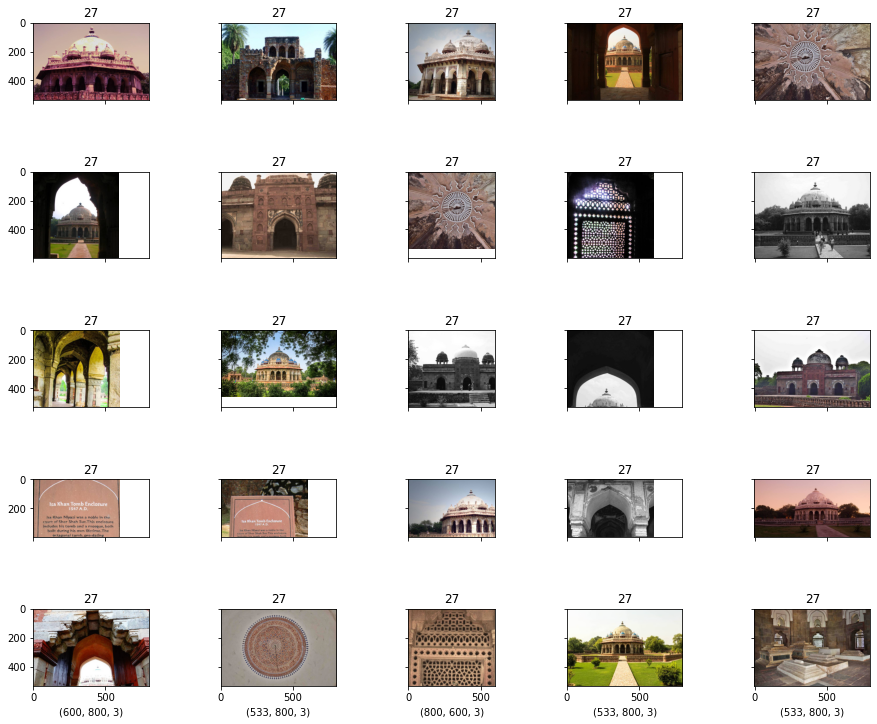

In [8]:
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import seaborn as sns
BASE_PATH = "../input/landmark-recognition-2021"
img_array_train = [get_img_numpy(img, BASE_PATH + "/train") for img in train['id'][500:525]]

image_grid5x5(img_array_train, [landmark for landmark in train['landmark_id'][500:525]])

<AxesSubplot:xlabel='landmark_id', ylabel='Count'>

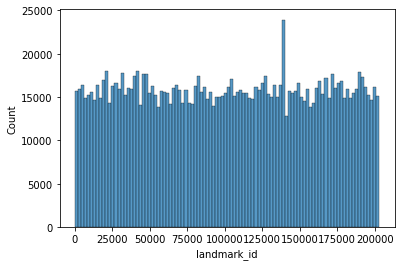

In [9]:
sns.histplot(data=train, x="landmark_id", bins=100)

[Text(0.5, 0, 'Landmarks'), Text(0, 0.5, 'Number of images')]

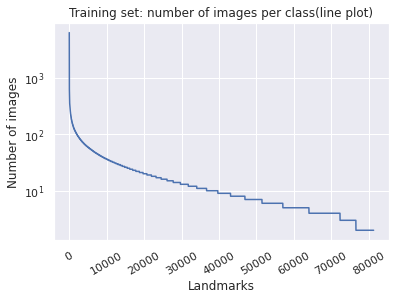

In [10]:
sns.set()
plt.title('Training set: number of images per class(line plot)')
landmarks_fold = pd.DataFrame(train['landmark_id'].value_counts())
landmarks_fold.reset_index(inplace=True)
landmarks_fold.columns = ['landmark_id','count']
ax = landmarks_fold['count'].plot(logy=True, grid=True)
locs, labels = plt.xticks()
plt.setp(labels, rotation=30)
ax.set(xlabel="Landmarks", ylabel="Number of images")

In [15]:
landmarks_fold.head()

,landmark_id,count
0,138982,6272
1,126637,2231
2,20409,1758
3,83144,1741
4,113209,1135
...,...,...
81303,81571,2
81304,20883,2
81305,151780,2
81306,184029,2


**here i am tring to get only the landmark image which has landmark_id 20883 **

In [17]:
train = train[train.landmark_id==20883]
train

,id,landmark_id
162605,727628e42171abcc,20883
162606,d020b53cc1a28aa6,20883


In [18]:
def get_train_file_path(image_id):
    return "../input/landmark-recognition-2021/train/{}/{}/{}/{}.jpg".format(
        image_id[0], image_id[1], image_id[2], image_id)
train['file_path'] = train['id'].apply(get_train_file_path)
train.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,landmark_id,file_path
162605,727628e42171abcc,20883,../input/landmark-recognition-2021/train/7/2/7...
162606,d020b53cc1a28aa6,20883,../input/landmark-recognition-2021/train/d/0/2...


there are two image in train data set which belong to landmark_id , i get the file path and i am going to plot using the file path 

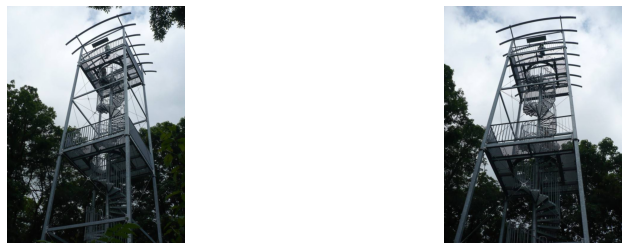

In [20]:
fig = plt.figure(figsize=(30,20))
x=1
for i in train.file_path[:20883]:
    image = cv2.imread(i)
    
    fig.add_subplot(4, 4, x)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    x+=1

\I am now going to extract featears from the image 